# **Clusterizacion**

In [131]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


import warnings

# Ignorar warnings
warnings.filterwarnings('ignore')

In [108]:
# Cargar el dataset
data = pd.read_csv("wholesale.csv")

In [109]:
print("--- Información inicial del Dataset ---")
print(data.info())

--- Información inicial del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [110]:
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [111]:
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [112]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### **Paso 1: Normalizar los datos**

In [113]:
# Normalización usando StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [114]:
print(scaler)

StandardScaler()


In [115]:
data.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [116]:
# Transformar los datos
datosNorm = scaler.transform(data)
datosNorm = pd.DataFrame(datosNorm, columns=data.columns)

In [117]:
datosNorm.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [118]:
# Normalización alternativa (opcional, con scale)
from sklearn.preprocessing import scale
datosNorm1 = pd.DataFrame(scale(data), columns=data.columns)

In [119]:
datosNorm1.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### **Paso 2: Eliminar variables no relevantes**

In [120]:
# Eliminamos las columnas 'Channel' y 'Region' que no serán utilizadas en el clustering
datosNorm1 = datosNorm1.drop(['Channel', 'Region'], axis=1)
datosNorm = datosNorm.drop(['Channel', 'Region'], axis=1)

### **Paso 3: Aplicar el algoritmo KMeans**

In [121]:
# Inicializamos KMeans con 4 clusters
kmeans = KMeans(
    algorithm='lloyd',
    copy_x=True,
    init='k-means++',
    max_iter=300,
    n_clusters=4,
    n_init=10,
    random_state=42,
    tol=0.0001,
    verbose=0
)

In [122]:
# Entrenamos el modelo con los datos normalizados
kmeans.fit(datosNorm1)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [123]:
# Asignar los clusters al dataset original
data["cluster"] = kmeans.predict(datosNorm1)

In [124]:
# Nota: No debes incluir la columna 'cluster' dentro de `datosNorm1` antes de calcular los centros.

# Extraer los centros de los clusters
centros = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=datosNorm1.columns  # Aquí usamos las columnas originales de datosNorm1
)

In [125]:
# Mostrar los centros
print("--- Centros de los Clusters ---")
print(centros)

--- Centros de los Clusters ---
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.507313  0.585563  0.809716 -0.324183          0.804182    0.083148
1  0.119108 -0.373268 -0.432646  0.041140         -0.426079   -0.141206
2  0.313830  3.921906  4.275610 -0.003574          4.618166    0.503365
3  3.029404  2.789687  0.891741  4.547364         -0.085354    6.059971


In [126]:
# Asignar los clusters al dataset original
data["cluster"] = kmeans.predict(datosNorm1)
datosNorm1["cluster"] = kmeans.predict(datosNorm1)

### **Paso 4: Evaluar el modelo**

In [127]:
# Calcular la puntuación de silueta
silhouette_avg = silhouette_score(datosNorm1.drop("cluster", axis=1), datosNorm1["cluster"])
print(f"Puntuación de Silueta: {silhouette_avg:.4f}")

Puntuación de Silueta: 0.3485


In [128]:
# Evaluar la inercia (suma de las distancias cuadradas dentro del cluster)
print(f"Inercia del modelo (distancia interna): {kmeans.inertia_:.4f}")

Inercia del modelo (distancia interna): 1317.8384


### **Paso 5: Visualizar los resultados**

In [129]:
# Visualizar los centros de los clusters
print("--- Centros de los Clusters ---")
print(centros)

--- Centros de los Clusters ---
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.507313  0.585563  0.809716 -0.324183          0.804182    0.083148
1  0.119108 -0.373268 -0.432646  0.041140         -0.426079   -0.141206
2  0.313830  3.921906  4.275610 -0.003574          4.618166    0.503365
3  3.029404  2.789687  0.891741  4.547364         -0.085354    6.059971


In [132]:
# Crear una gráfica de dispersión para visualizar los clusters (usando PCA para reducir a 2 dimensiones)
pca = PCA(n_components=2)
datos_pca = pca.fit_transform(datosNorm1.drop("cluster", axis=1))
datos_pca = pd.DataFrame(datos_pca, columns=["PCA1", "PCA2"])
datos_pca["cluster"] = datosNorm1["cluster"]

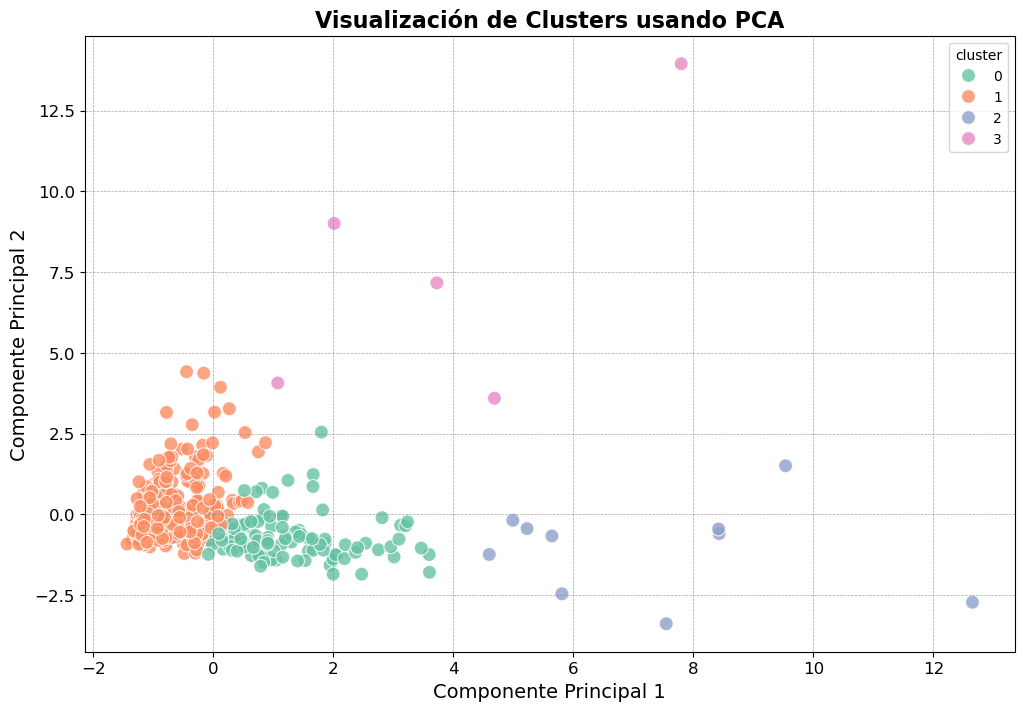

In [133]:
# Gráfica de dispersión con seaborn
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="cluster",                # Color basado en los clusters
    palette="Set2",               # Paleta de colores para los clusters
    data=datos_pca,               # DataFrame con las componentes principales y clusters
    legend="full",
    s=100,                        # Tamaño de los puntos
    alpha=0.8                     # Transparencia para mejor visualización
)

# Ajustar el título y las etiquetas
plt.title("Visualización de Clusters usando PCA", fontsize=16, fontweight='bold')
plt.xlabel("Componente Principal 1", fontsize=14)
plt.ylabel("Componente Principal 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar la cuadrícula
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mostrar la gráfica
plt.show()


### **Paso 6: Optimizar el número de clusters (K)**

In [134]:
# Usamos el método del codo para determinar el número óptimo de clusters
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(datosNorm1.drop("cluster", axis=1))
    inertia.append(kmeans_temp.inertia_)
    silhouette_scores.append(
        silhouette_score(datosNorm1.drop("cluster", axis=1), kmeans_temp.labels_)
    )

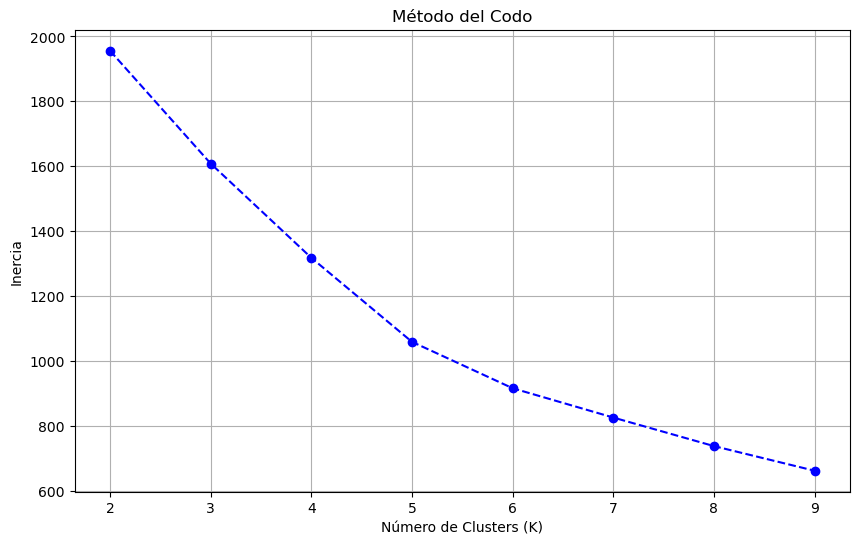

In [135]:
# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertia, marker='o', linestyle='--', color='b')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

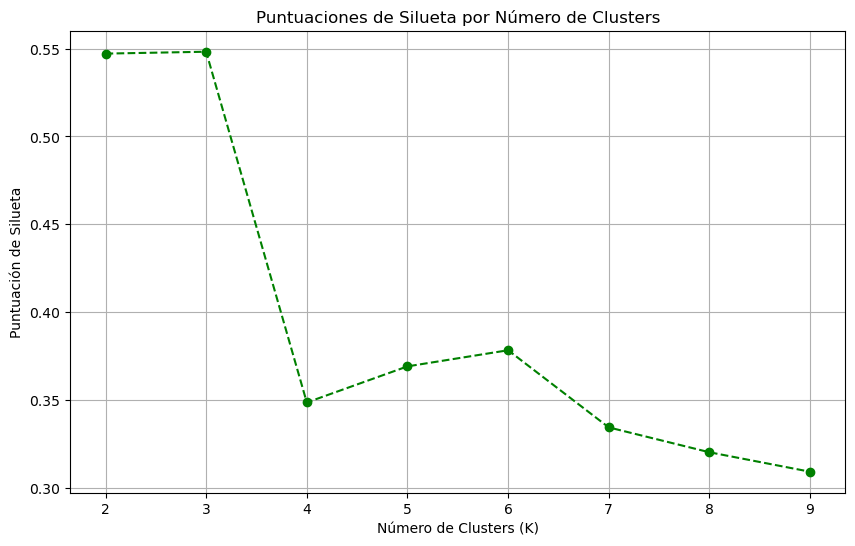

In [136]:
# Graficar las puntuaciones de Silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='g')
plt.title("Puntuaciones de Silueta por Número de Clusters")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Puntuación de Silueta")
plt.grid(True)
plt.show()

### **Paso 7: Interpretar los resultados**

In [137]:
print("--- Asignación de Clusters ---")
print(data["cluster"].value_counts())

--- Asignación de Clusters ---
1    315
0    110
2     10
3      5
Name: cluster, dtype: int64


In [138]:
# Resumen estadístico por cluster
resumen_clusters = data.groupby("cluster").mean()
print("--- Resumen Estadístico por Cluster ---")
print(resumen_clusters)

--- Resumen Estadístico por Cluster ---
          Channel    Region         Fresh          Milk       Grocery  \
cluster                                                                 
0        1.845455  2.554545   5591.436364  10113.027273  15637.390909   
1        1.120635  2.536508  13504.987302   3044.539683   3844.444444   
2        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
3        1.200000  2.800000  50270.600000  26361.800000  16416.000000   

               Frozen  Detergents_Paper    Delicassen  
cluster                                                
0         1499.918182       6711.354545   1759.090909  
1         3271.425397        852.320635   1127.107937  
2         3054.600000      24875.200000   2942.800000  
3        25122.800000       2475.000000  18595.200000  
